## REGRESSION AND MACHINE LEARNING

In [ ]:
#pip install Statsmodels
#Package: Statsmodels.api

## SIMPLE LINEAR REGRESSION

### SLR WITH ADVERTISING DATA

In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,statsmodels.api as sm

In [ ]:
Data = pd.read_csv(r"C:\Users\USER\Downloads\Advertising.csv")

In [ ]:
Data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
Data.shape

(200, 4)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
Data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### MODEL TO BE ESTIMATED : SALES = a+b(TV)

### DATA PREPROCESSING

In [ ]:
Data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
Data.duplicated().sum()

0

<AxesSubplot:>

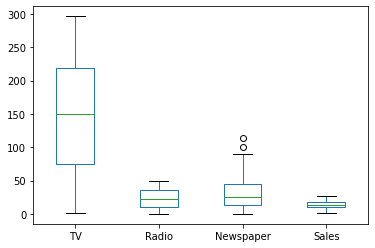

In [ ]:
Data.plot(kind = "box")

In [ ]:
x = Data['TV']

In [ ]:
y = Data['Sales']

In [ ]:
from sklearn.model_selection import train_test_split

#### TRAIN-TEST-SPLIT OF X AND Y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 10)

In [ ]:
X_train.shape,y_train.shape

((140,), (140,))

In [ ]:
X_test.shape,y_test.shape

((60,), (60,))

### Building the model using Statsmodels packages

In [ ]:
x = sm.add_constant(x)

In [ ]:
x.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [ ]:
mod = sm.OLS(y_train,X_train).fit()

In [ ]:
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1210.
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                    1.79e-70
Time:                        19:14:09   Log-Likelihood:                         -415.00
No. Observations:                 140   AIC:                                      832.0
Df Residuals:                     139   BIC:                                      834.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Sales = 1+0.0831(TV)

### INTERPRETATION

### CHECKING REGRESSION ASSUMPTIONS

#### 1. Normality of Residual or Error

<AxesSubplot:ylabel='Density'>

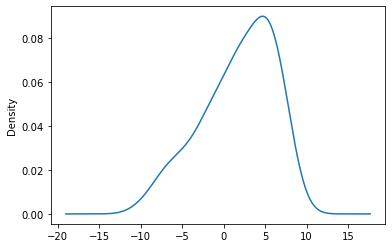

In [ ]:
mod.resid.plot(kind = 'density')

In [ ]:
mod.resid.skew(),mod.resid.kurtosis() #Approximately normal

(-0.6425630954717791, -0.3875332641790381)

#### 2. Test for autocorrelation

#### 3.Test for heteroscedacity

#### Scatterplot of actuat values against residuals

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

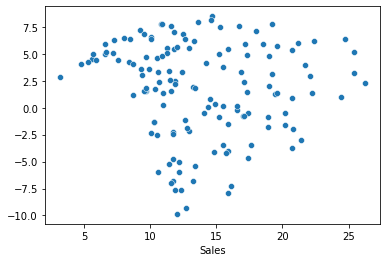

In [ ]:
sns.scatterplot(y,mod.resid)

#### Checking for RMSE of the train model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
Pred = mod.predict(X_train)

In [ ]:
np.sqrt(mean_squared_error(Pred,y_train))

4.689572310297024

In [ ]:
Pred_test = mod.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(Pred_test,y_test))

5.048262296057792

### MULTIPLE LINEAR REGRESSION MODEL

In [ ]:
Data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
Data.duplicated().sum()

0

<AxesSubplot:>

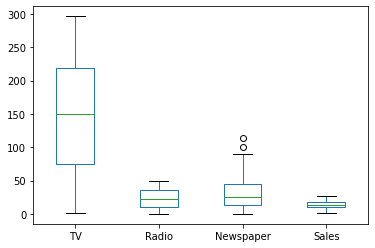

In [ ]:
Data.plot(kind = 'box')

In [ ]:
Data['Newspaper'].quantile([0.95])

0.95    71.825
Name: Newspaper, dtype: float64

In [ ]:
Data['Newspaper'] = np.where(Data['Newspaper']>71.825,72,Data['Newspaper'])

<AxesSubplot:>

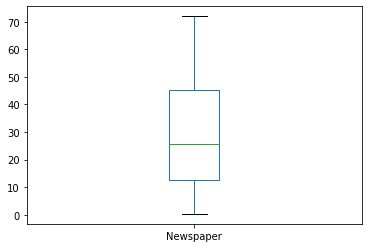

In [ ]:
Data['Newspaper'].plot(kind = 'box')

### HANDLING MULTICOLLINEARITY

<AxesSubplot:>

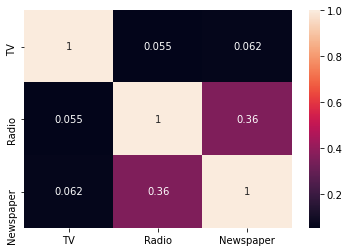

In [ ]:
sns.heatmap(Data.drop('Sales',axis = 1).corr(),annot = True)

#### MODEL TO BE ESTIMATED: Sales = a+b1(TV)+b2(Radio)+b3(Newspaper)

##### TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = Data.drop('Sales',axis = 1)

In [ ]:
y = Data['Sales']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 120)

#### ADDING INTERCEPT TO X

In [ ]:
X_train = sm.add_constant(X_train)

In [ ]:
X_train.head()

,const,TV,Radio,Newspaper
111,1.0,241.7,38.0,23.2
156,1.0,93.9,43.5,50.5
140,1.0,73.4,17.0,12.9
171,1.0,164.5,20.9,47.4
157,1.0,149.8,1.3,24.3


#### BUILDING MLR WITH STATSMODEL PACKAGE

In [ ]:
mod = sm.OLS(y_train, X_train)

In [ ]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     485.1
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.05e-72
Time:                        19:14:11   Log-Likelihood:                -262.48
No. Observations:                 140   AIC:                             533.0
Df Residuals:                     136   BIC:                             544.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7267      0.350      7.793      0.0

<AxesSubplot:ylabel='Density'>

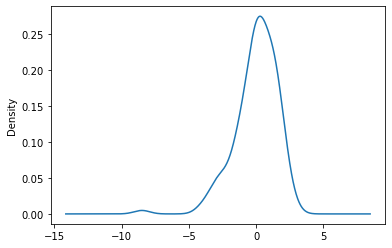

In [ ]:
mod.fit().resid.plot(kind = 'kde')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

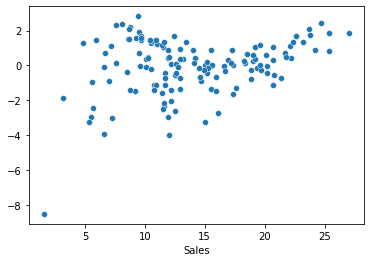

In [ ]:
sns.scatterplot(y,mod.fit().resid)

#### CHECKING ACCURACY OF THE TRAINING MODEL

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mod = sm.OLS(y_train,X_train).fit()

In [ ]:
pred = mod.predict(X_train)

In [ ]:
mean_squared_error(pred,y_train)

2.4889591716315658

In [ ]:
np.sqrt(mean_squared_error(pred,y_train))

1.5776435502456079

#### MLR USING SEABORN

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mod = LinearRegression()

In [ ]:
fit = mod.fit(X_train,y_train)

In [ ]:
fit.intercept_

2.726711695168486

In [ ]:
fit.coef_

array([0.        , 0.04758575, 0.18423586, 0.00491197])

### MAIN PROBLEMS IN REGREESION ANALYSIS

### IMPROVING THE ACCURACY OF LINEAR REGRESSION

#### SUMMARY OF REGRESSION

## MACHINE LEARNING MASTERY